### Dividing 2 integers
 - problem: divide 2 integers without using division or multiplication
 - Approaches
   - ~~Subtract until nothing left, handle sign by moving things to a common side of the number line then flipping~~ This took way to darn long, especially when dividend >> divisor.
   - Binary Long Division
       1. Starting with the first digit in the dividend (this will be the temporary dividend) determine if the divisor is larger than that
           * if yes:
               * write a one above that digit, subtract dividend from that digit
           * if no
               * write a 0 above that digit, add the next digit in the divisor to the temporary dividend and repeat.
           * Leetcode accepts this answer as sufficiently fast


In [3]:
# imports
import unittest
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
class Solution:
    def __init(self):
        pass
    def determine_sign(self, dividend, divisor):
        # put everything on same side of number line
        if divisor < 0 and dividend < 0:
            divisor = 0 - divisor
            dividend = 0 - dividend
            flip = False
            
        elif divisor < 0:
            divisor = 0 - divisor
            flip = True
            
        elif dividend < 0:
            dividend = 0 - dividend
            flip = True
        else:
            flip = False
            
        self.flip = flip
        return divisor, dividend
        
    def divide(self, dividend: int, divisor: int) -> int:
        divisor, dividend = self.determine_sign(dividend, divisor)
        count = 0
        residual = dividend
        while residual >= 0:
            residual -= divisor
            count += 1
            
        if self.flip:
            return 0 - (count - 1)
        return count - 1
        
        

In [5]:
# test cases and times
solver = Solution()
print("Expected: {} actual: {}".format(2, solver.divide(4,2)))
print("Expected: {} actual: {}".format(2, solver.divide(-4,-2)))
print("Expected: {} actual: {}".format(-2, solver.divide(4,-2)))
print("Expected: {} actual: {}".format(-2, solver.divide(-4,2)))
print("Expected: {} actual: {}".format(8, solver.divide(73,9)))



Expected: 2 actual: 2
Expected: 2 actual: 2
Expected: -2 actual: -2
Expected: -2 actual: -2
Expected: 8 actual: 8


In [8]:
class Solution1():
    def divide(self, dividend: int, divisor: int) -> int:
        # put everything on same side of number line
        # because python binary strings start with 0b the first digit is the 3rd
        if divisor < 0 and dividend < 0:
            divisor = 0 - divisor
            dividend = 0 - dividend
            flip = False
            
        elif divisor < 0:
            divisor = 0 - divisor
            flip = True
            
        elif dividend < 0:
            dividend = 0 - dividend
            flip = True
        else:
            flip = False
        
        
        place = 2
        result = '0b'
        dividend = bin(dividend)
        divisor = bin(divisor)
        div_temp = dividend[0:place]
        for i in range(place, len(dividend)):
            div_temp += dividend[i]
            if int(divisor, 2) > int(div_temp, 2):
                result += '0'
            else:
                result += '1'
                div_temp = bin(int(div_temp, 2) - int(divisor, 2))
                
        
        if flip:
            if int(result, 2) >  2147483648:
                return -2147483647
            return 0 - int(result, 2)
        else:
            if int(result, 2) >  2147483647:
                return 2147483647
        return int(result, 2)
                
                
         
        

In [9]:
s = Solution1()

s.divide(-2147483648,-1)

2147483647

[0. 0. 0. 0. 0. 0.] [0.00000000e+00 0.00000000e+00 5.01108170e-03 8.58809948e-02
 1.69402051e+00 3.70886965e+01]


(-1, 50)

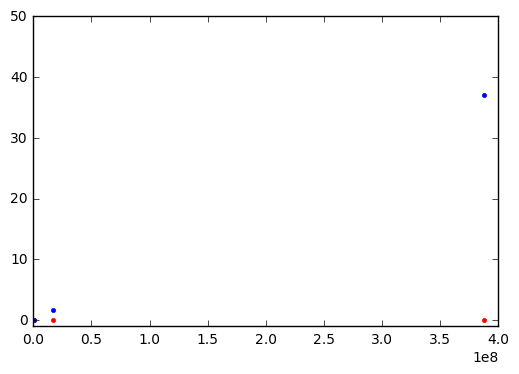

In [32]:
import numpy as np
import time
def time_results(sln, numbers):
    times = np.zeros(numbers.shape)
    for i in range(numbers.shape[0]):
        t1 = time.time()
        times[i] = sln.divide(numbers[i], 3)
        t2 = time.time()
        times[i] = t2 - t1
    return times

test_numbers = np.array([i**i for i in range(4, 10)])
times1 = time_results(Solution1(), test_numbers)
times2 = time_results(Solution(), test_numbers)
print(times1, times2)
plt.figure()
plt.plot(test_numbers, times1, 'r.')
plt.plot(test_numbers, times2, 'b.')
plt.ylim([-1, 50])
